In [ ]:
#pip install qiskit

In [ ]:
#pip install qiskit[visualization]

In [ ]:
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
import numpy as np
import math as m

In [ ]:
qreg_q = QuantumRegister(5, 'q')
creg_c = ClassicalRegister(5, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

steps = 1

for i in range(steps):
  circuit.h(qreg_q[3])
  circuit.h(qreg_q[4])
  circuit.x(qreg_q[3])
  circuit.x(qreg_q[4])
  circuit.cz(qreg_q[3], qreg_q[4])
  circuit.x(qreg_q[3])
  circuit.h(qreg_q[3])
  circuit.x(qreg_q[4])
  circuit.h(qreg_q[4])
  circuit.x(qreg_q[4])
  circuit.ccx(qreg_q[3], qreg_q[4], qreg_q[1])
  circuit.x(qreg_q[3])
  circuit.ccx(qreg_q[4], qreg_q[3], qreg_q[0])
  circuit.x(qreg_q[4])
  circuit.ccx(qreg_q[3], qreg_q[4], qreg_q[2])
  circuit.x(qreg_q[3])

In [ ]:
print("Depth: ", circuit.depth())

Depth:  12


In [ ]:
print("Size: ", circuit.size())

Size:  16


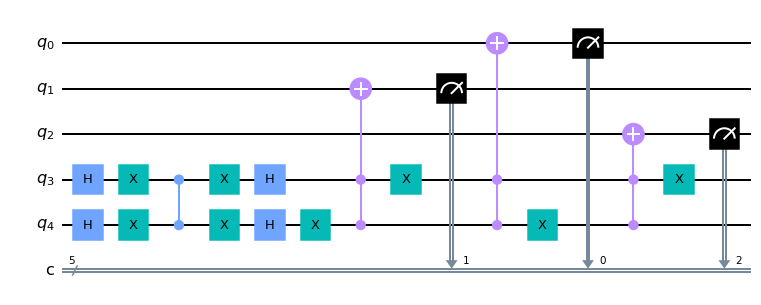

In [ ]:
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2])
circuit.draw('mpl')

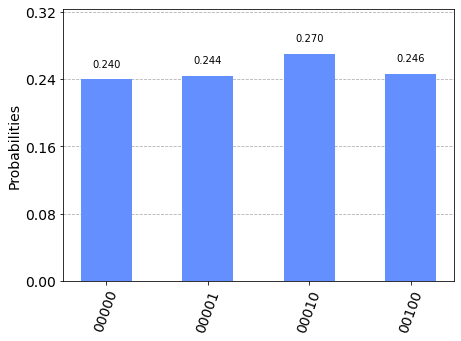

In [ ]:
sim = qiskit.Aer.get_backend('qasm_simulator')
job = qiskit.execute(circuit,sim,shots=1024)
qiskit.visualization.plot_histogram(job.result().get_counts())